In [6]:
import kagglehub
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [7]:
# Download latest version
path = kagglehub.dataset_download("toramky/automobile-dataset")
path

'/Users/unrealre/.cache/kagglehub/datasets/toramky/automobile-dataset/versions/2'

In [18]:
# Указываем, что '?' следует считать как NaN (пропущенное значение)
df = pd.read_csv(os.path.join(path, "Automobile_data.csv"), na_values='?')
print(f"Размер данных до очистки: {df.shape}") # Посмотреть исходный размер
df.head()

Размер данных до очистки: (205, 26)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [25]:
# Удаляем строки, где 'price' имеет пропущенное значение (NaN)
df.dropna(inplace=True)
print(f"Размер данных после удаления строк с NaN в 'price': {df.shape}")

Размер данных после удаления строк с NaN в 'price': (159, 26)


In [26]:
df.shape

(159, 26)

In [27]:
X = df.copy()
y = X.pop("price")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int
discrete_features

symboling             True
normalized-losses    False
make                  True
fuel-type             True
aspiration            True
num-of-doors          True
body-style            True
drive-wheels          True
engine-location       True
wheel-base           False
length               False
width                False
height               False
curb-weight           True
engine-type           True
num-of-cylinders      True
engine-size           True
fuel-system           True
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg              True
highway-mpg           True
dtype: bool

In [28]:
X.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
3,2,164.0,0,0,0,0,0,0,0,99.8,...,0,109,0,3.19,3.4,10.0,102.0,5500.0,24,30
4,2,164.0,0,0,0,0,0,1,0,99.4,...,1,136,0,3.19,3.4,8.0,115.0,5500.0,18,22
6,1,158.0,0,0,0,0,0,0,0,105.8,...,1,136,0,3.19,3.4,8.5,110.0,5500.0,19,25
8,1,158.0,0,0,1,0,0,0,0,105.8,...,1,131,0,3.13,3.4,8.3,140.0,5500.0,17,20
10,2,192.0,1,0,0,1,0,2,0,101.2,...,0,108,0,3.50,2.8,8.8,101.0,5800.0,23,29


In [29]:
X.dtypes

symboling              int64
normalized-losses    float64
make                   int64
fuel-type              int64
aspiration             int64
num-of-doors           int64
body-style             int64
drive-wheels           int64
engine-location        int64
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type            int64
num-of-cylinders       int64
engine-size            int64
fuel-system            int64
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
dtype: object

In [31]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores

curb-weight          1.477958
highway-mpg          0.919297
horsepower           0.874452
engine-size          0.866865
city-mpg             0.744840
length               0.699380
width                0.696865
wheel-base           0.626923
fuel-system          0.473997
bore                 0.464791
make                 0.428274
height               0.309991
stroke               0.298693
drive-wheels         0.273865
num-of-cylinders     0.261386
peak-rpm             0.231878
symboling            0.184986
normalized-losses    0.161063
aspiration           0.119975
engine-type          0.113165
compression-ratio    0.110840
body-style           0.055865
fuel-type            0.052198
engine-location      0.000000
num-of-doors         0.000000
Name: MI Scores, dtype: float64

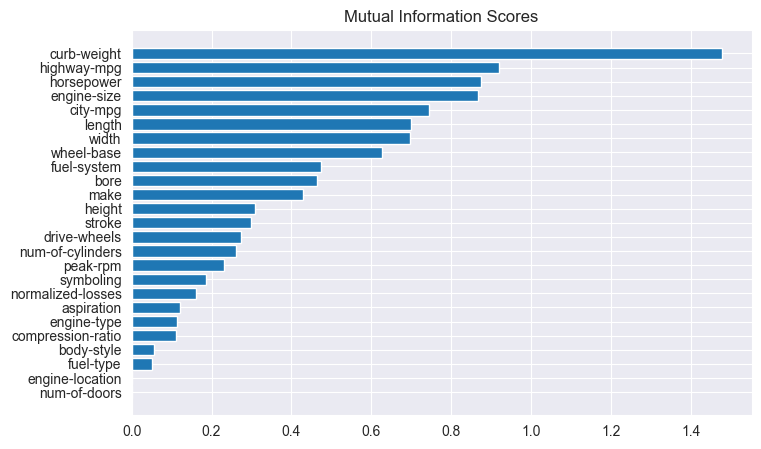

In [32]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

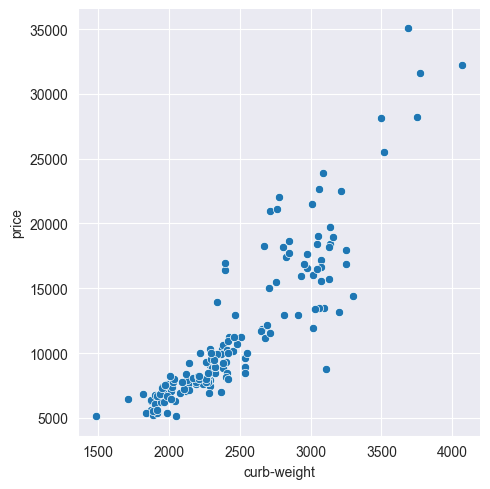

In [35]:
# Визуализируем взаимную информацию между 'curb_weight' и 'price'
sns.relplot(x="curb-weight", y="price", data=df)

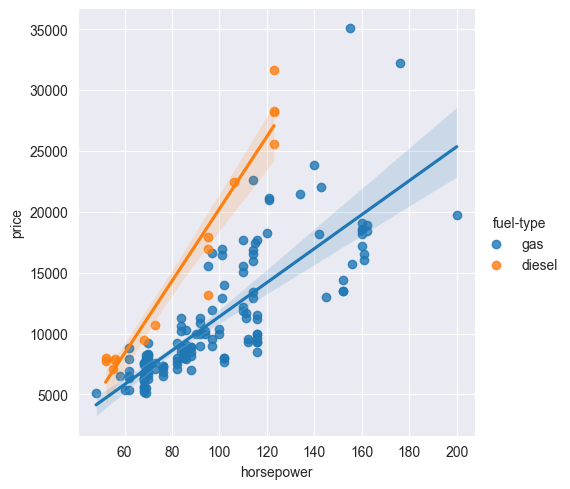

In [38]:
sns.lmplot(x="horsepower", y="price", hue="fuel-type", data=df)
# fuel-type сам по себе имеет очень маленький MI-score, но если посмотреть на его взаимодействие с 'horsepower', то он становится важным признаком